In [1]:
import pandas as pd
import numpy as np

In [2]:
weather = pd.read_csv("weatherAUS.csv")
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
features=["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed3pm","Humidity9am","Humidity3pm"
,"Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm"]

In [41]:
#cleaning (dropping the rows which have missing values)
weather = weather.dropna(subset=features)

In [42]:
data = weather[features].copy()
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,17.9,35.2,0.0,12.0,12.3,48.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
6054,24.2,41.0,0.0,11.2,8.4,35.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3
142299,21.2,32.6,0.0,7.6,8.6,37.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0
142300,20.7,32.8,0.0,5.6,11.0,33.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1
142301,19.5,31.8,0.0,6.2,10.6,26.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2


# Scaling-Mean normalisation(All values brought under the range 0-10)

In [43]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [44]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000
mean,5.732630,5.095662,1.092558,1.603180,5.775280,3.470882,3.319742,6.961089,5.473847,6.533891,6.501922,5.782191,5.331297,5.238298,5.016722
std,1.527536,1.426491,0.305220,0.409026,2.337561,1.048522,1.014899,1.675760,1.819095,1.042840,1.005016,3.153209,2.649680,1.474961,1.450887
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.566929,3.965909,1.000000,1.310345,4.103448,2.721739,2.539474,5.950000,4.240000,5.838063,5.805825,2.125000,3.000000,4.081886,3.886792
50%,5.677165,5.029545,1.000000,1.532020,6.337931,3.347826,3.250000,7.030000,5.590000,6.529215,6.490291,6.625000,6.000000,5.153846,4.948113
75%,6.905512,6.215909,1.026188,1.820197,7.641379,4.052174,3.842105,8.200000,6.670000,7.235392,7.174757,8.875000,8.000000,6.382134,6.115566
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [45]:
data.head() #values now range from 0 to 10

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,6.811024,7.361364,1.0,2.330049,8.634483,4.052174,3.368421,2.80,2.17,4.876461,4.975728,3.250,6.0,7.141439,7.304245
6050,6.929134,6.072727,1.0,2.640394,9.068966,3.191304,3.250000,3.70,1.72,5.868114,6.097087,2.125,2.0,5.734491,5.945755
6052,7.165354,7.852273,1.0,2.197044,7.579310,3.895652,2.776316,4.78,2.98,5.777963,5.674757,2.125,7.0,7.610422,7.622642
6053,7.755906,8.015909,1.0,2.263547,8.572414,2.721739,1.710526,4.33,2.98,5.838063,5.660194,2.125,6.0,7.699752,7.771226
6054,8.299213,8.547727,1.0,2.241379,6.213793,3.034783,2.539474,2.71,2.35,5.537563,5.412621,2.125,7.0,8.704715,8.195755



#Resetting index values

ind=[]
for i in range(56720):
    ind.append(i)     
data['Index']=ind
data.set_index("Index", inplace=True)
data

# Randomly initialising centroids for k number of clusters

In [46]:
def random_centroids(data, k):
    centroids = [] # one centroid contains one value for all features(columns)
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) #apply iterates through all columns choosing any one random value for each column
        centroids.append(centroid) #sample() returns type dataframe. Hence we convert 
    return pd.concat(centroids, axis=1) #All centroids(each cetroid is a panda series) are put together as a single pandas dataframe


In [47]:
centroids = random_centroids(data, 5)

In [48]:
centroids #Each column is a centroid

,0,1,2,3,4
MinTemp,5.299213,3.244094,6.905512,5.700787,5.559055
MaxTemp,2.800000,3.822727,3.679545,2.840909,4.415909
Rainfall,1.000000,1.000000,1.000000,1.445199,1.000000
Evaporation,1.044335,1.155172,1.576355,1.598522,1.864532
Sunshine,8.448276,7.889655,8.013793,1.062069,4.413793
WindGustSpeed,2.486957,5.226087,3.739130,4.365217,4.365217
WindSpeed3pm,3.842105,3.250000,2.539474,2.302632,2.776316
Humidity9am,7.750000,7.120000,5.770000,6.580000,4.960000
Humidity3pm,2.260000,6.130000,6.760000,3.520000,5.140000
Pressure9am,8.166945,5.732888,6.559265,5.612688,4.891486


In [49]:
centroids.T

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,5.299213,2.800000,1.000000,1.044335,8.448276,2.486957,3.842105,7.75,2.26,8.166945,7.538835,6.625,7.0,3.702233,6.922170
1,3.244094,3.822727,1.000000,1.155172,7.889655,5.226087,3.250000,7.12,6.13,5.732888,4.655340,8.875,1.0,7.498759,6.667453
2,6.905512,3.679545,1.000000,1.576355,8.013793,3.739130,2.539474,5.77,6.76,6.559265,7.495146,2.125,4.0,5.176179,2.209906
3,5.700787,2.840909,1.445199,1.598522,1.062069,4.365217,2.302632,6.58,3.52,5.612688,6.446602,3.250,2.0,5.779156,3.780660
4,5.559055,4.415909,1.000000,1.864532,4.413793,4.365217,2.776316,4.96,5.14,4.891486,7.961165,6.625,4.0,2.786600,2.910377


We need to look at each datapoint and find euclidean distance btw datapoint and cluster center. Find cluster center closest to that datapoint

In [50]:
distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
distances

,0,1,2,3,4
6049,9.681207,10.996638,9.457888,11.404547,10.236382
6050,9.567526,10.479333,7.691908,9.864087,9.400179
6052,9.420617,11.563583,9.030492,10.921039,10.496501
6053,9.922727,11.782369,9.142190,11.575999,11.061026
6054,11.584478,13.299456,11.013328,11.833664,11.906172
...,...,...,...,...,...
142298,9.948346,10.049458,7.446574,9.247990,10.059334
142299,9.534114,6.811127,10.331748,9.680236,8.427201
142300,10.716348,10.583227,7.966457,9.375500,10.334541
142301,9.943975,9.038353,6.259610,9.010657,9.154639


each row represents distances btw that datapt and all k number of centroids

In [51]:
distances.idxmin(axis=1)

6049      2
6050      2
6052      2
6053      2
6054      2
         ..
142298    2
142299    1
142300    2
142301    2
142302    0
Length: 58265, dtype: int64

In [52]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)#finds the index of the minimum value in each row

In [53]:
labels = get_labels(data, centroids)
labels

6049      2
6050      2
6052      2
6053      2
6054      2
         ..
142298    2
142299    1
142300    2
142301    2
142302    0
Length: 58265, dtype: int64

In [54]:
labels.value_counts() #valuecounts counts the number of times a value occurs in a column

4    24069
2    23144
0     7031
1     3815
3      206
dtype: int64

# Centroid updation

take GM of features. It gives centre of each cluster/cluster centroid

In [55]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T #data is split acc to labels and GM calculated
    return centroids
#Eg: 1st ele is the geometric mean of all MinTemp values in that cluster. Each row reps the same feature 

In [56]:
new_centroids(data, labels, 5)

,0,1,2,3,4
MinTemp,5.672319,6.916596,5.437606,5.485139,5.350667
MaxTemp,5.628227,6.153567,5.304896,5.308080,4.178982
Rainfall,1.036704,1.072898,1.025124,1.028520,1.125523
Evaporation,1.649657,1.747843,1.639760,1.661633,1.433320
Sunshine,6.622102,7.035546,7.394801,3.701345,3.119433
WindGustSpeed,3.213811,3.447254,3.199687,3.793929,3.455017
WindSpeed3pm,3.089777,3.505986,3.101986,3.385403,3.195092
Humidity9am,6.510314,6.825767,6.032466,5.934795,7.504989
Humidity3pm,4.197412,5.113122,4.395764,3.751064,6.321889
Pressure9am,6.562003,5.904349,6.644758,6.153177,6.318648


# Visualise clusters

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
#PCA helps view our 15 dimensional data as 1D and hence we can graph it and visualize

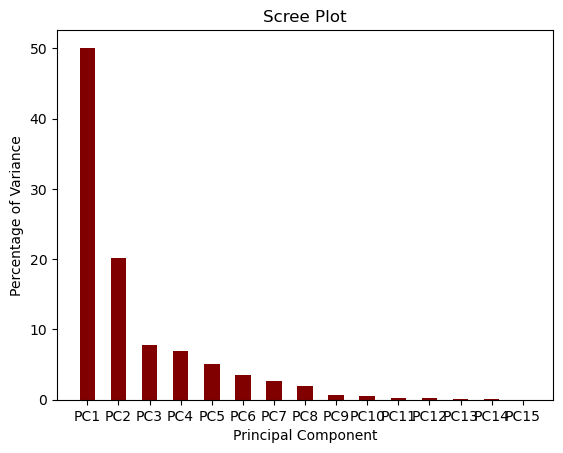

In [61]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)#PCA object created #PCA model initialization returning 2 columns/data with several columns converted to data with 2 cols
    data_2d = pca.fit_transform(data) #PCA math(calc loading scores and variation of each PC) based on that 2D data generated
    centroids_2d = pca.transform(centroids.T) #columns-features;rows-datapoints format needed for pca
    clear_output(wait=True) #clears the graph after each iter
    plt.title(f'Iteration number {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels) #x-1st comp return by pca,y-2nd component returned by pcA
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1]) #prints the centroid over it
    plt.show()
    
#Scree plot
pca = PCA()
data_2d = pca.fit_transform(data)
percentage = np.round(pca.explained_variance_ratio_* 100, decimals=1) #percentage of variation of components
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] #created labels PC1,PC2..
 
plt.bar(x=range(1,len(percentage)+1), height=percentage, tick_label=labels,color='maroon', width=0.5)
plt.ylabel('Percentage of Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
#2d graph will be plotted using PC1 and PC2

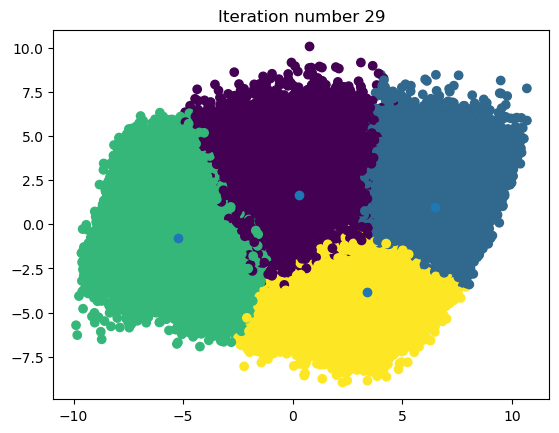

In [62]:
max_iterations = 150
k=4 #number of clusters  

centroids = random_centroids(data, k) #random initialisation
old_centroids = pd.DataFrame()
iteration = 1

#if old centroids become equal to new ones, it means they've stopped shifting,so stop

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids) #which cluster each datapoint goes into
    centroids = new_centroids(data, labels, k) #update centroid value
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

# Interpretting the output

In [63]:
centroids #0-more humid,more rainfall,less temp,less sunshine
#1-high temp,sunny

,0,1,2,3
MinTemp,6.489225,6.401177,5.140037,4.142258
MaxTemp,5.713068,6.519353,3.921680,4.150007
Rainfall,1.061793,1.009395,1.142250,1.029559
Evaporation,1.689136,1.929059,1.369838,1.376870
Sunshine,6.182708,8.134060,2.684629,6.802130
WindGustSpeed,3.481080,3.449306,3.340113,2.948000
WindSpeed3pm,3.403865,3.225589,3.090832,2.884048
Humidity9am,6.551700,5.032410,8.009710,6.960197
Humidity3pm,5.074189,3.471166,6.811001,4.797445
Pressure9am,6.125194,6.236459,6.423437,7.265197


In [64]:
labels.value_counts()

2    18702
0    17235
1    11280
3    11048
dtype: int64

In [65]:
weather[labels == 3]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6163,2009-04-25,Cobar,12.7,23.4,0.6,5.0,10.6,NW,46.0,WSW,...,64.0,36.0,1010.3,1006.0,1.0,5.0,17.1,21.9,No,No
6164,2009-04-26,Cobar,11.2,18.4,1.0,5.6,9.0,WNW,63.0,WSW,...,54.0,37.0,1011.1,1010.7,1.0,6.0,13.1,16.5,No,No
6165,2009-04-27,Cobar,5.7,19.7,0.0,4.8,10.3,WSW,52.0,WSW,...,58.0,34.0,1017.7,1015.2,0.0,1.0,12.6,18.8,No,No
6170,2009-05-02,Cobar,6.6,20.6,0.0,2.4,10.6,S,28.0,SE,...,39.0,29.0,1025.6,1022.5,0.0,1.0,15.2,19.8,No,No
6171,2009-05-03,Cobar,7.5,22.8,0.0,4.2,10.7,ESE,30.0,SE,...,54.0,22.0,1026.0,1023.5,0.0,1.0,14.8,21.9,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138444,2015-08-29,AliceSprings,4.1,23.5,0.0,5.6,11.4,E,31.0,E,...,28.0,18.0,1024.3,1020.2,1.0,0.0,14.7,22.0,No,No
138449,2015-09-03,AliceSprings,3.9,21.3,0.0,8.0,11.3,ESE,37.0,SSE,...,37.0,40.0,1024.0,1020.2,0.0,0.0,12.8,19.3,No,No
138450,2015-09-04,AliceSprings,4.2,25.0,0.0,7.0,11.0,ESE,30.0,ESE,...,43.0,23.0,1024.5,1020.0,0.0,0.0,14.0,22.6,No,No
138455,2015-09-09,AliceSprings,2.4,23.2,0.0,7.2,11.4,E,37.0,ESE,...,30.0,11.0,1028.9,1024.6,0.0,0.0,14.3,22.3,No,No


In [66]:
weather[labels == 2][["Location"] + features]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6092,Cobar,16.8,23.3,0.6,8.0,2.3,63.0,35.0,66.0,53.0,1013.8,1012.2,7.0,7.0,18.5,22.4
6093,Cobar,16.1,19.1,26.0,6.6,0.0,54.0,19.0,81.0,93.0,1014.3,1013.2,7.0,7.0,17.1,17.0
6095,Cobar,17.4,19.7,0.0,6.0,0.0,48.0,20.0,65.0,97.0,1011.2,1010.7,7.0,7.0,19.2,17.1
6096,Cobar,15.9,20.8,32.6,3.0,0.3,44.0,19.0,94.0,77.0,1011.9,1010.2,8.0,7.0,16.6,20.6
6148,Cobar,16.5,20.6,14.4,6.0,0.0,30.0,9.0,97.0,76.0,1021.3,1019.3,7.0,7.0,16.9,19.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142227,Darwin,25.1,31.8,1.2,4.6,0.0,54.0,28.0,73.0,55.0,1007.6,1003.8,6.0,7.0,26.6,31.5
142228,Darwin,20.6,21.9,23.4,6.4,0.0,52.0,31.0,95.0,95.0,1007.4,1003.9,8.0,8.0,21.1,19.0
142243,Darwin,25.4,29.2,0.0,5.4,0.0,26.0,13.0,72.0,66.0,1011.0,1007.9,7.0,7.0,26.8,28.9
142244,Darwin,24.4,27.4,0.2,2.2,0.0,39.0,7.0,73.0,86.0,1011.4,1008.8,8.0,8.0,25.5,25.9


# Choosing the right k value(Elbow method)

In [67]:
#elbow method or silhouette method
import sklearn.cluster as cluster

In [68]:
#WSS = Within-Cluster-Sum of Squared
K = range(1,15)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")#init=k-means++ chooses centroids
    kmeans=kmeans.fit(data)
    wss_iter = kmeans.inertia_ #stores each iter values of wss
    wss.append(wss_iter)
    
centers = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
centers

,Clusters,WSS
0,1,2.428518e+06
1,2,1.531611e+06
2,3,1.317764e+06
3,4,1.144735e+06
4,5,1.053285e+06
5,6,9.736145e+05
6,7,9.133919e+05
7,8,8.664496e+05
8,9,8.292749e+05
9,10,7.975819e+05


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

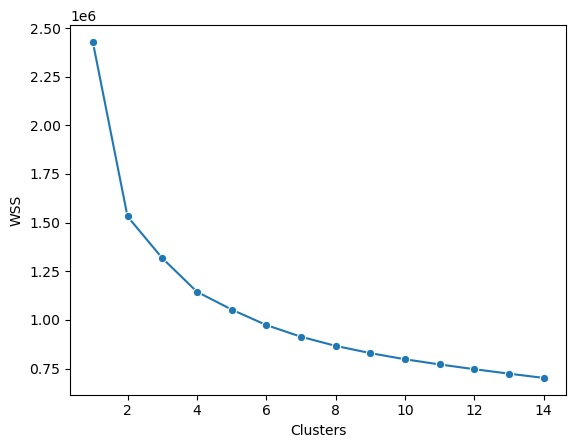

In [69]:
import seaborn as sns
sns.lineplot(x = 'Clusters', y = 'WSS', data = centers, marker="o")

The elbow is at k=4. WSS value not rapid after k=4. Hence k=4 (4 clusters)